In [205]:
# Python 3.11.2
# %pip install -r requriments.txt

# Python 3.10.10
# %conda install --file requriments.txt
# %conda create --name PD --file file.txt

In [206]:
from IPython.display import Image

# Импорт библиотек для работы с данными
import pandas as pd
import numpy as np
import scipy.stats as stats

# Импорт библиотек для визуализации данных
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Импорт библиотек для пред обработки данных
from sklearn.preprocessing import MaxAbsScaler, RobustScaler
from sklearn import preprocessing

# Импорт библиотек для отбора признаков
from sklearn.feature_selection import RFE, RFECV, SelectFromModel, SelectFpr, chi2

# Импорт библиотек для валидации и кросс-валидации
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Импорт библиотек линейной регрессии
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Poisson
from statsmodels.regression.recursive_ls import RecursiveLS
from statsmodels.regression.linear_model import OLS, GLS, GLSAR, WLS
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

# Импорт библиотек для машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Импорт библиотек для оценки качества моделей
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Анализ экономики Москвы через построение и оценку параметров систем независимых, регрессионных и одновременных уравнений.

## Введение
Анализ экономики Москвы является важной задачей, которая требует построения и оценки параметров систем независимых, регрессионных и одновременных уравнений. Это позволяет получить более точное представление о взаимосвязях и влиянии различных факторов на экономические показатели города. Такой анализ может быть полезен для принятия решений в различных сферах, таких как инвестиции, управление городской инфраструктурой, развитие бизнеса и других. В данной работе мы рассмотрим методы построения и оценки параметров систем уравнений, которые могут быть применены для анализа экономики Москвы и помогут получить более глубокое понимание экономической ситуации в городе.

## Цель работы
Целью данной работы является анализ экономики Москвы через построение и оценку параметров систем независимых, регрессионных и одновременных уравнений.

## Задачи работы
Для достижения поставленной цели необходимо решить следующие задачи:
- Провести предварительный анализ данных, визуализировать их, выявить и устранить выбросы, пропуски и аномалии.
- Построить систему независимых уравнений, оценить параметры уравнений системы, проанализировать их значимость и провести отбор признаков.
- Построить систему регрессионных уравнений, оценить параметры уравнений системы, проанализировать их значимость и провести отбор признаков.
- Построить систему одновременных уравнений, оценить параметры уравнений системы, проанализировать их значимость и провести отбор признаков.
- Сравнить результаты оценки параметров систем независимых, регрессионных и одновременных уравнений.
- Сделать выводы по результатам проведенного анализа.

## Методы исследования
Для решения поставленных задач будут использованы следующие методы:
- Методы визуализации данных (гистограммы, диаграммы рассеяния, диаграммы корреляции, диаграммы боксплот, диаграммы виолончели)
- Методы предобработки данных (заполнение пропусков, удаление выбросов, нормализация данных)
- Методы отбора признаков (обратное и прямое исключение признаков)
- Методы валидации и кросс-валидации (hold-out, k-fold, leave-one-out, leave-p-out, repeated k-fold)
- Методы линейной регрессии (OLS, GLS, GLSAR, WLS, RecursiveLS, Poisson)
- Методы машинного обучения (линейная регрессия, регрессия с регуляризацией, логистическая регрессия, метод опорных векторов, метод ближайших соседей, наивный байесовский классификатор, дерево решений, случайный лес, персептрон, градиентный спуск)
- Методы оценки качества моделей (R2, MAE, MSE)

# Предварительный анализ и обработка данных

Прежде чем приступать к построению и оценке параметров систем независимых, регрессионных и одновременных уравнений, необходимо провести предварительный анализ данных, визуализировать их, выявить и устранить выбросы, пропуски и аномалии. Для этого загрузим данные и посмотрим на них. Для визуализации данных будем использовать библиотеку plotly express, а для работы с данными - библиотеку pandas.

## Загрузка данных

In [207]:
# Загрузка данных с помощью pandas из файла csv
data = pd.read_csv("input/data.csv", delimiter=";")

# Заранее объявим столбец с годом так как он понадобится нам позже
year = data['Год']

# Просмотр первых 5 строк данных
data.head()

,Год,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,1998,87211.83,328497.9,638450.60,228548.4,803.2,5780.87,1212184.0,33.8,83359.41,25719.20,6171.0,6642.0,111458.0,1393.30
1,1999,119302.33,695059.8,789466.92,488395.1,787.6,5823.01,1272744.0,35.2,87820.24,25262.15,7260.0,7814.0,185861.0,1807.80
2,2000,156215.00,1159034.0,962057.00,748241.8,1472.8,5865.15,1444737.0,32.4,92700.80,25720.20,8067.0,9194.0,309534.0,2185.00
3,2001,173839.00,1370182.8,1393532.20,1008088.5,1154.6,5907.28,1841258.0,30.4,98088.36,24905.88,5545.0,12637.0,418289.0,2385.26
4,2002,220396.00,1767476.7,1771073.00,1267935.2,1508.7,5961.24,2255912.0,35.1,104100.59,25084.01,6932.0,13817.0,589139.0,2918.55


Наши данные содержат следующие признаки:

- Год - год, в котором были собраны данные

Зависимые переменные:
- $y_1$ - инвестиции в основной капитал, млн руб.
- $y_2$ - валовой региональный продукт (ВРП), млн.руб.
- $y_3$ - сумма доходов населения за год, млн руб.

Независимые переменные:
- $x_1$ - финансовый результат деятельности (чистая прибыль)
- $x_2$ - прямые иностранные инвестиции, млн USD
- $x_3$ - среднегодовая численности занятых, тыс чел.
- $x_4$ - стоимость основных фондов, млн. руб
- $x_5$ - степень износа основных фондов, %
- $x_6$ - затраты на научные исследования и разработки, млн руб.
- $x_7$ - объём инновационных товаров работ услуг, млн руб.
- $x_8$ - экспорт, млн USD
- $x_9$ - импорт, млн. USD
- $x_{10}$ - сумма остатков вкладов на счетах в Банке России, млн. руб.
- $x_{11}$ - прожиточный минимум в регионе РФ (г. Москва), тыс.руб.

In [208]:
data.shape

(25, 15)

На данном этапе мы видим, что в наших данных 15 признаков (включая год) и 25 наблюдение.

## Изучение данных на наличие пропусков, нулевых значений и ошибок измерений

Посмотрим имеются ли в данных пропуски и нулевые значения. Для этого воспользуемся методом isna() и sum().

In [209]:
pd.concat([data.isna().sum(), data.isnull().sum()], axis=1, keys=['isna', 'isnull'])

,isna,isnull
Год,0,0
y1,0,0
y2,0,0
y3,0,0
x1,0,0
x2,0,0
x3,0,0
x4,0,0
x5,0,0
x6,0,0


Пропусков и нулевых значений в данных нет, так как нами заранее была проведена очистка и обработка данных на которую мы потратили достаточно много времени.

Подробно на этом этапе мы останавливаться не будем, так как это не является целью данной работы. Если обобщить, то при обработке данных были удалены ненужные признаки, а также были заполнены пропуски, удалены выбросы и аномалии, исправлены ошибки измерения.

Далее опишем функцию, которая поможет нам визуализировать все имеющиеся данные, а так же является мощным инструментом для поиска ошибок измерения (по графикам рассеяния можно увидеть наличие выбросов и аномалий).

Функция ```combine_scatter_plots``` строит графики рассеяния для каждой пары признаков в наборе данных. Это позволяет нам визуально оценить наличие ошибок измерений. Если ошибок нет, то точки на графике должны располагаться вблизи линии тренда. Если же точки расположены вдали от линии тренда, то это может говорить о наличии ошибок измерений. В таком случае необходимо исключить из набора данных некорректные значения.

In [210]:
def combine_scatter_plots(height=1000, width=1100, isyear=True):
    fig = make_subplots(rows=5, cols=3)
    data_copy = data.copy()
    if isyear:
        data_copy.drop('Год', axis=1, inplace=True)
    for i, column in enumerate(data_copy.columns.values):
        if 0 <= i < 3:
            row, col = 1, i + 1
        elif 3 <= i < 6:
            row, col = 2, i + 1 - 3
        elif 6 <= i < 9:
            row, col = 3, i + 1 - 6
        elif 9 <= i < 12:
            row, col = 4, i + 1 - 9
        else:
            row, col = 5, i + 1 - 12

        if 0 <= i < 3:
            fig.add_trace(go.Scatter(y=data_copy[f'y{i + 1}'], x=year, name=column), row=row, col=col)
        else:
            fig.add_trace(go.Scatter(y=data_copy[f'x{i - 2}'], x=year, name=column), row=row, col=col)
    fig.update_layout(height=height, width=width, title_text="Зависимость признаков от времени")
    fig.show()

In [211]:
combine_scatter_plots()

На графиках рассеяния видно, что в большинстве случаев точки расположены вблизи линии тренда (к примеру $y_1$, $y_2$), что говорит об отсутствии ошибок измерений, но есть несколько признаков с достаточно сильным отклонением (к примеру $x_2$, $x_5$), несмотря на это мы не будем их удалять, так как в этих случаях данные и правда являются корректными.

## Проверка данных на наличие выбросов и изучение распределения данных

Нахождение выбросов - это один из методов анализа данных, который используется для выявления аномальных значений в наборе данных. Выбросы могут возникать из-за ошибок в данных, случайных вариаций или из-за наличия редких, но реальных экстремальных значений.

Существует несколько методов нахождения выбросов, в том числе метод Z-оценки и метод межквартильного размаха (IQR).

**Межквартильный размах (IQR)**

Метод межквартильного размаха (IQR) основан на вычислении интерквартильного размаха - разницы между 75-перцентилью и 25-перцентилем. Затем определяется верхняя и нижняя границы выбросов, которые определяются как 1,5 межквартильных размаха за пределами верхнего и нижнего квартилей.

$$(Q_1 - 1.5 \cdot IQR, Q_3 + 1.5 \cdot IQR)$$

In [212]:
# Находим Первый квартиль (Q1) и Третий квартиль (Q3) и рассчитываем межквартильный размах
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

# Оставляем только те значения, которые больше нижней границы и меньше верхней границы.
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean.shape

(25, 15)

**Z-оценка**

Метод Z-оценки основан на расчете Z-оценки для каждого значения в наборе данных и проверке, насколько далеко каждое значение от среднего значения. Значения, которые находятся на расстоянии больше чем три стандартных отклонения от среднего, могут быть считаны выбросами.

$$z = \frac{x - \mu}{\sigma}$$

In [213]:
z = np.abs(stats.zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(25, 15)

В результате проверки на наличие выбросов мы получили исходный набор данных. Это говорит нам о том что выбросов в данных найденно не было.

In [214]:
# Заменяем исходный набор данных на очищенный
data = data_clean

Еще одним мощными инстурментом для проверки данных на наличие выбросов и аномалий являются ящиковые диаграммы и диаграммы скрипок. Построим их для каждого признака в наборе данных. Для этого реализуем функции ```combine_box_plots``` и ```combine_violin_plots```.

Функция combine_box_plots строит ящиковые диаграммы для каждого признака в наборе данных, где значения признака разбиваются на квартили и представляются в виде ящика. Ящик показывает границы первого и третьего квартилей, а также медиану. Черта внутри ящика показывает медиану, а концы усов - границы первого и третьего квартилей. Точки, выходящие за границы усов, считаются выбросами. Также на графике отображаются все значения признака.

In [215]:
# Построение графиков
def combine_box_plots(height=1000, width=1100):
    fig = make_subplots(rows=5, cols=3)
    data_copy = data.copy()
    data_copy.drop('Год', axis=1, inplace=True)
    for i, column in enumerate(data_copy.columns.values):
        if 0 <= i < 3:
            row, col = 1, i + 1
        elif 3 <= i < 6:
            row, col = 2, i + 1 - 3
        elif 6 <= i < 9:
            row, col = 3, i + 1 - 6
        elif 9 <= i < 12:
            row, col = 4, i + 1 - 9
        else:
            row, col = 5, i + 1 - 12

        if 0 <= i < 3:
            fig.add_trace(go.Box(x=data_copy[f'y{i + 1}'], name=column), row=row, col=col)
        else:
            fig.add_trace(go.Box(x=data_copy[f'x{i - 2}'], name=column), row=row, col=col)
    fig.update_layout(height=height, width=width, title_text="Ящиковые диаграммы распределения признаков",
                      showlegend=False)
    fig.show()

In [216]:
combine_box_plots()

Функция combine_violin_plots строит аналогичные диаграммы, но вместо ящика используется график, который представляет **распределение** значений признака с помощью ядерной оценки плотности.

In [217]:
def combine_violin_plots(height=1500, width=1100):
    fig = make_subplots(rows=5, cols=3)
    data_copy = data.copy()
    data_copy.drop('Год', axis=1, inplace=True)
    for i, column in enumerate(data_copy.columns.values):
        if 0 <= i < 3:
            row, col = 1, i + 1
        elif 3 <= i < 6:
            row, col = 2, i + 1 - 3
        elif 6 <= i < 9:
            row, col = 3, i + 1 - 6
        elif 9 <= i < 12:
            row, col = 4, i + 1 - 9
        else:
            row, col = 5, i + 1 - 12

        if 0 <= i < 3:
            fig.add_trace(go.Violin(x=data_copy[f'y{i + 1}'], name=column), row=row, col=col)
        else:
            fig.add_trace(go.Violin(x=data_copy[f'x{i - 2}'], name=column), row=row, col=col)
    fig.update_layout(height=height, width=width, title_text="Распределение признаков", showlegend=False)
    fig.show()

In [218]:
combine_violin_plots()

Как мы можем видеть, в данных нет выбросов и аномалий. Также мы можем заметить, что распределение значений признаков не является нормальным. Имеются как унимодально распределенные признаки, так и многомодально распределенные признаки.

## Интерполяция данных

В предыдущем разделе мы убедились, что в наших данных нет пропусков и нулевых значений. Однако, мы имеем всего лишь 25 наблюдений, что является недостаточным количеством для построения моделей, так как это приводит к большим ошибкам и переобучению модели. Поэтому нам необходимо увеличить количество наблюдений. Для этого мы будем использовать метод интерполяции данных.

Для этого создадим класс ```InterpolateData```, который будет принимать на вход данные и метод интерполяции. По умолчанию метод интерполяции равен 'linear', а частота - 'Q' (квартальная). Для интерполяции данных мы будем использовать метод interpolate() из библиотеки pandas.

In [219]:
class InterpolateData:
    def __init__(self, data, method='linear', freq='Q'):
        self.data = data.copy()
        self.year = pd.to_datetime(self.data['Год'].astype(str), format='%Y')
        self.data_quarterly = data.copy()
        self.data_quarterly['Год'] = pd.to_datetime(self.data_quarterly['Год'].astype(str), format='%Y')
        self.data_quarterly.set_index('Год', inplace=True)
        self.data_quarterly = self.data_quarterly.resample(freq).mean().interpolate(method=method)

    def head(self):
        return self.data_quarterly.head()

    def scatter(self):
        return px.scatter(self.data_quarterly)

    def original_scatter(self):
        return px.scatter(self.data.drop(columns=['Год']), x=self.year, y=self.data.drop(columns=['Год']).columns)

    def after_interpolate(self):
        return self.data_quarterly

В нашей работе мы будем использовать метод интерполяции под наименованием 'akima'. Данный метод является одним из наиболее точных методов интерполяции. Для наглядности построим графики рассеяния до и после интерполяции.

### Данные до интерполяции

In [220]:
InterpolateData(data).original_scatter()

### Данные после интерполяции с помощью метода 'akima'

In [221]:
# InterpolateData(data).scatter()
# InterpolateData(data, method='cubic').scatter()
# InterpolateData(data, method='quadratic').scatter()
InterpolateData(data, method='akima').scatter()

In [222]:
data = InterpolateData(data, method='akima').after_interpolate()
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,87211.830000,328497.900000,638450.600000,228548.400000,803.200000,5780.870000,1.212184e+06,33.800000,83359.410000,25719.200000,6171.000000,6642.000000,111458.000000,1393.300000
1998-06-30,94837.309463,411892.838304,674544.769921,293398.535166,736.807795,5791.387033,1.217777e+06,34.608070,84434.697999,25523.220133,6463.512671,6918.993559,124811.328689,1499.653740
1998-09-30,102889.910331,502956.211813,712651.354330,358916.449175,715.808030,5802.012446,1.231037e+06,35.205168,85548.268093,25385.183334,6737.509484,7214.574151,140986.309803,1604.366468
1998-12-31,111150.973194,598751.486752,751524.460148,424389.258043,735.228912,5812.630376,1.250140e+06,35.444336,86686.056887,25300.419162,7001.119718,7517.765363,161117.650948,1707.432327
1999-03-31,119302.330000,695059.800000,789466.920000,488395.100000,787.600000,5823.010000,1.272744e+06,35.200000,87820.240000,25262.150000,7260.000000,7814.000000,185861.000000,1807.800000


In [223]:
data.shape

(97, 14)

После интерполяции данных мы получили $\sim$100 наблюдений (было 25), что является достаточным количеством для построения моделей. Так же мы удалили столбец 'Год', так как он больше не нужен. Снова посмотри на то как распределены признаки. После этого перейдем к избавлению от мультиколлинеарности.

In [224]:
combine_scatter_plots(isyear=False)

## Избавление от мультиколлинеарности между признаками путем нормализации и центрирования данных

Мультиколлинеарность - это явление, при котором два или более предикторов взаимосвязаны между собой. Это может привести к нестабильности оценок и усложнить интерпретацию результатов. Чтобы избежать этого, можно использовать нормализацию и центрирование данных. В данном случае была использована нормализация данных.

В нашем случае мы будем использовать следующие методы нормализации данных:
- Центрирование данных
- Минимаксная нормализация данных
- Z-нормализация данных
- Max-нормализация данных
- Robust-нормализация данных

### Центрирование данных для избавления от мультиколлинеарности
Этот способ приводит все значения признаков к среднему значению 0. Это делается путем вычитания среднего значения из каждого значения признака.
$$
x_{i}^{*}=x_{i}-\bar{x}
$$

In [225]:
# data = data.apply(lambda x: x - x.mean())

### Минимаксная нормализация данных
Этот метод приводит все значения признаков к диапазону от 0 до 1. Это делается путем вычитания минимального значения и деления на разницу между максимальным и минимальным значениями. Именно этот метод нормализации данных мы будем использовать в нашей работе, как основным.

$$
x_{i}^{*}=\frac{x_{i}-\min (x)}{\max (x)-\min (x)}
$$

In [226]:
data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

### Нормализация средним (Z-нормализация)
Этот метод приводит все значения признаков к диапазону от -1 до 1. Это делается путем вычитания среднего значения и деления на стандартное отклонение.
$$
x_{i}^{*}=\frac{x_{i}-\bar{x}}{\sigma}
$$

In [227]:
# data = data.apply(lambda x: (x - x.mean()) / x.std())

### MaxAbsScaler
Этот метод приводит все значения признаков к диапазону от -1 до 1. Это делается путем деления на максимальное абсолютное значение.
$$
x_{i}^{*}=\frac{x_{i}}{\max \left(\left|x_{i}\right|\right)}
$$

In [228]:
# transformer = MaxAbsScaler().fit(data)
# data = pd.DataFrame(transformer.transform(data))

### RobustScaler
Этот метод приводит все значения признаков к диапазону от -1 до 1. Это делается путем вычитания медианы и деления на интерквартильный размах.
$$
x_{i}^{*}=\frac{x_{i}-\operatorname{med}(x)}{IQR}
$$

In [229]:
# transformer = RobustScaler().fit(data)
# data = pd.DataFrame(transformer.transform(data))

In [230]:
data.columns = ['y1', 'y2', 'y3', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,0.000000,0.000000,0.000000,0.000000,0.000549,0.000000,0.000000,0.195697,0.000000,0.001083,0.002159,0.000000,0.000000,0.000000
1998-06-30,0.001461,0.003661,0.002672,0.007145,0.000132,0.012626,0.000074,0.242208,0.002618,0.000874,0.003168,0.002142,0.000315,0.006140
1998-09-30,0.003004,0.007658,0.005493,0.014364,0.000000,0.025383,0.000250,0.276576,0.005330,0.000727,0.004113,0.004428,0.000697,0.012186
1998-12-31,0.004587,0.011863,0.008371,0.021578,0.000122,0.038130,0.000503,0.290342,0.008100,0.000637,0.005022,0.006773,0.001172,0.018136
1999-03-31,0.006149,0.016090,0.011180,0.028630,0.000451,0.050591,0.000802,0.276278,0.010861,0.000596,0.005915,0.009064,0.001756,0.023931


In [231]:
data.describe()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.280612,0.411240,0.413234,0.570639,0.295993,0.642033,0.297719,0.532230,0.363552,0.290738,0.377432,0.526356,0.282371,0.449744
std,0.267194,0.305783,0.294206,0.335540,0.301088,0.356222,0.297026,0.269585,0.298230,0.340438,0.297490,0.345171,0.279944,0.330173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051987,0.110826,0.139756,0.207856,0.008448,0.307521,0.035678,0.302592,0.086122,0.001083,0.013112,0.134146,0.029304,0.133382
50%,0.206232,0.353243,0.401297,0.681265,0.093874,0.862597,0.221125,0.560047,0.298663,0.044640,0.451129,0.626384,0.193764,0.419308
75%,0.437538,0.649347,0.633337,0.862760,0.543122,0.973696,0.465300,0.725231,0.601016,0.603005,0.627561,0.791089,0.490985,0.790886
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Как мы видим из таблицы, все признаки находятся в диапазоне от 0 до 1. Так же мы видим, что среднее значение признаков близко к 0.5, а стандартное отклонение близко к 0.3. Это говорит о том, что данные нормализованы правильно. Это позволило нам избавиться от мультиколлинеарности между признаками.

## Добавление шума в данные

Для объяснения добавления шума в данные, рассмотрим следующий график. На нем изображены зависимости признаков от времени.

In [232]:
# px.scatter(data, title="Зависимость признаков от времени", height=500)
px.scatter(data['y1'], title="Зависимость признаков от времени", height=500)

Как видно из графика, данные имеют очень сильную линейную структуру, из-за этого мы получаем сверх высокие метрики при обучении модели. Добавление шума в данные, позволяет сделать данные более реалистичными, так как в реальных данных всегда присутствует шум. Так же добавление шума в данные позволяет сделать данные более устойчивыми к выбросам.

In [233]:
noise = np.random.normal(0, .06, data.shape)
noisy_data = data + noise
data = noisy_data
data = data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
px.scatter(data['y1'], title="Зависимость признаков от времени", height=500)

In [234]:
combine_scatter_plots(isyear=False)

Теперь наши данные выглядят более реалистично. Так же мы видим, что данные стали более устойчивыми к выбросам.

## Построение матрицы коэффициентов межфакторной корреляции

In [235]:
fig = px.imshow(data.corr(), text_auto='.2f', color_continuous_scale="gnbu",
                labels={'color': 'R', 'x': 'Фактор', 'y': 'Фактор'})
fig.update_layout(height=1000, title_text="Матрица коэффициентов межфакторной корреляции")
fig.show()

Можно заметить, что между некоторыми признаками есть сильная линейная зависимость. Но при этом большая часть признаков слабо коррелирует между собой.

In [236]:
un_data = data.copy()
un_data.columns = ['Инвестиции в основной капитал, млн руб. y1', 'Валовой региональный продукт (ВРП), млн.руб. y2',
                   'Сумма доходов населения за год, млн руб. y3',
                   'Финансовый результат деятельности (чистая прибыль), млн.руб. x1',
                   'Прямые иностранные инвестиции, млн USD x2',
                   'Среднегодовая численности занятых, тыс чел. x3', 'Стоимость основных фондов, млн. руб. x4',
                   'Степень износа основных фондов, % x5',
                   'Затраты на научные исследования и разработки, млн руб. x6',
                   'Объём инновационных товаров работ услуг, млн руб. x7', 'Экспорт, млн USD x8',
                   'Импорт, млн. USD x9', 'Сумма остатков вкладов на счетах в Банке России, млн. руб. x10',
                   'Прожиточный минимум в регионе РФ (г. Москва), тыс.руб. x11']

fig = px.imshow(un_data.corr(), text_auto='.2f', color_continuous_scale="gnbu",
                labels={'color': 'R', 'x': 'Фактор', 'y': 'Фактор'})
fig.update_layout(height=1000, title_text="Матрица коэффициентов межфакторной корреляции")
fig.show()

# Разделение данных на обучающую и тестовую выборки. Валидация и кросс-валидация

Для дальнейшего обучения модели, данные разделяются на обучающую и тестовую выборки. Обучающая выборка - это часть данных, на которых модель будет обучаться.

In [237]:
X = data.drop(['y1', 'y2', 'y3'], axis=1)
y = data[['y1', 'y2', 'y3']]

X.shape, y.shape

((97, 11), (97, 3))

Для упрощения написания коды заранее разделим данный на зависимые и независимые переменные.

## Валидация на отложенных данных (Hold-Out Validation)
**Валидация на отложенных данных (Hold-Out Validation)** - способ валидации при котором данные разделяются на две выборки: обучающую и тестовую. В этом методе, модель обучается на обучающей выборке данных, а затем проверяется на тестовой выборке, которая содержит данные, не использованные при обучении модели. Обычно, обучающая выборка составляет 70-80% от исходных данных, а тестовая - оставшиеся 20-30%.

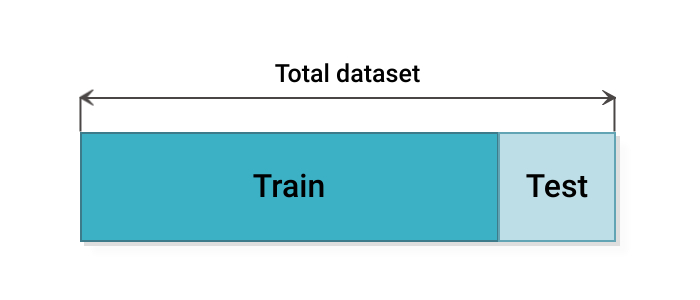

In [238]:
Image('https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Cross-validation-hold-out.jpg', width=600)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Кросс-валидация (Cross-validation)
**Кросс-валидация (Cross-validation)** – способ [[Валидация (Validating)|валидации]] при котором данные разбиваются на несколько равных частей, называемых "складками" (folds). Затем каждая складка используется в качестве тестовой выборки, а оставшиеся складки - в качестве обучающей выборки. Таким образом, модель обучается и тестируется на каждой из складок, что позволяет получить оценку ее производительности на всех данных.

Этот метод обеспечивает более стабильные оценки производительности, чем [[Валидация на отложенных данных (Hold-Out Validation)|метод отложенной выборки]], но может быть затратным с точки зрения вычислительных ресурсов.

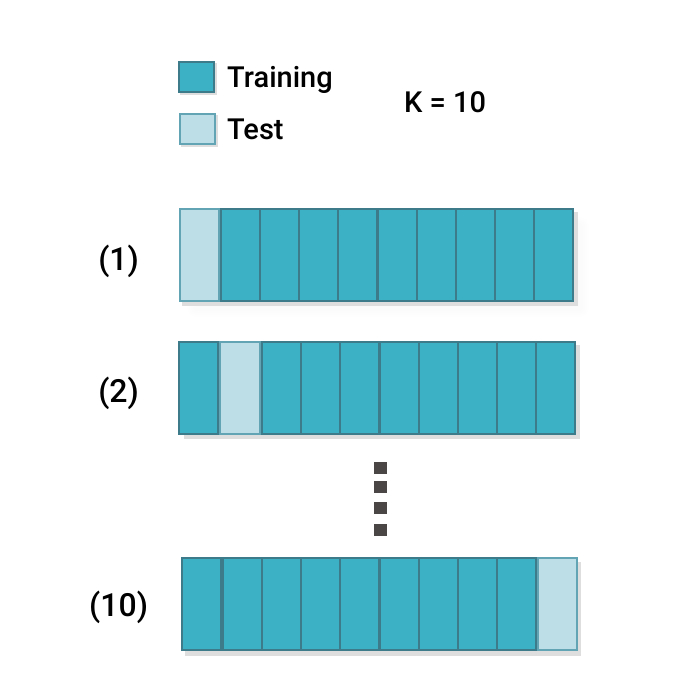

In [240]:
Image('https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Cross-validation-k-fold.jpg', width=600)

In [241]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
#
# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Leave-One-Out Cross-validation (LOO/LOOCV)
**Leave-One-Out Cross-validation (LOO/LOOCV)** - это частный случай кросс-валидации, при котором количество складок равно количеству наблюдений в данных. Таким образом, каждое наблюдение используется в качестве тестовой выборки, а оставшиеся наблюдения - в качестве обучающей выборки. Этот метод обеспечивает наиболее точную оценку производительности модели, но может быть очень затратным с точки зрения вычислительных ресурсов.

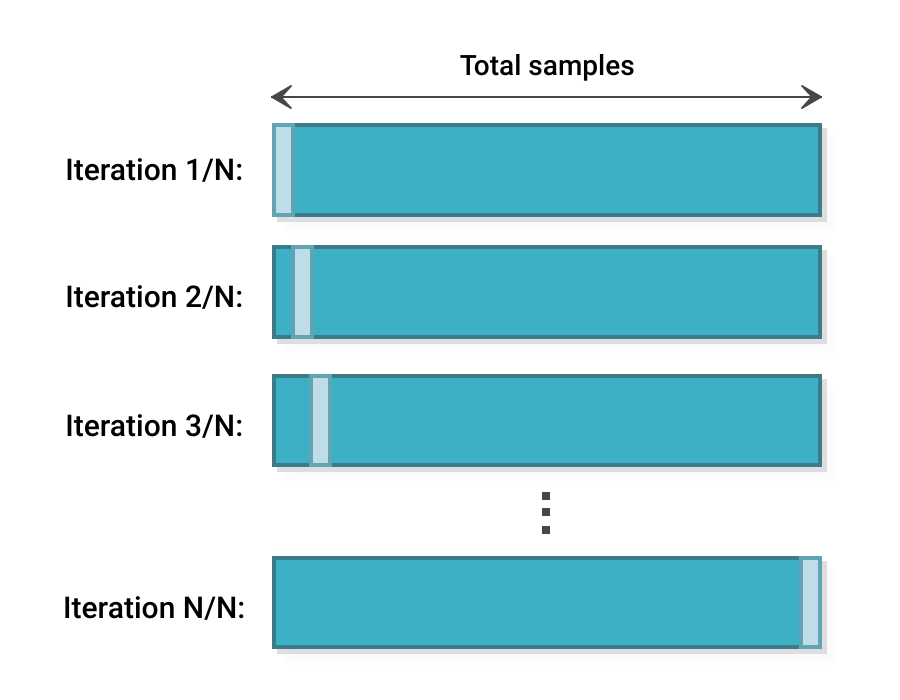

In [242]:
Image('https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/Cross-validation-leave-one-out.jpg', width=600)

In [243]:
# loo = LeaveOneOut()
#
# for train_index, test_index in loo.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Leave-p-out cross-validation (LpOC)
**Leave-p-out cross-validation (LpOC)** - почти полностью повторяет метод Leave-One-Out cross-validation (LOO/LOOCV) и отличается лишь тем что изначально задается размер тестовой выборки в то время как в Leave-One-Out cross-validation он всегда равен 1.

In [244]:
# lpo = LeavePOut(p=5)

# for train_index, test_index in lpo.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

В итоге получаем следующие размеры выборок:

In [245]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67, 11), (30, 11), (67, 3), (30, 3))

# Построение модели линейной регрессии

Линейная регрессия - это метод анализа данных, который используется для описания и прогнозирования линейной связи между зависимой и одной или несколькими независимыми переменными. Он часто используется в статистическом анализе данных для построения математической модели, которая может быть использована для прогнозирования значений зависимой переменной на основе значений независимых переменных.

Для построения модели линейной регрессии необходимо иметь набор данных, который состоит из пар значений зависимой и независимой переменных. Затем на основе этих данных проводится анализ, который позволяет оценить параметры модели - коэффициенты наклона и пересечения. Эти параметры могут быть использованы для построения уравнения линейной регрессии.

Для оценки качества модели линейной регрессии используются различные статистические показатели, такие как коэффициент детерминации (R-квадрат) или корреляционный коэффициент. Они позволяют оценить, насколько хорошо модель соответствует данным и насколько точно она может использоваться для прогнозирования значений зависимой переменной.

Важно понимать, что линейная регрессия является моделью, которая описывает только линейные отношения между переменными. Если связь между переменными не является линейной, то модель линейной регрессии может оказаться неэффективной и требовать использования других методов анализа данных.

In [246]:
class CustomLinearRegression:
    def __init__(self, y, x, model_type=OLS):
        self.model_type = model_type
        self.y = y
        self.x = x
        self.model = self.model_type(self.y, self.x).fit()

    def get_coefficients(self):
        print(self.model.params)
        answer = []
        names = self.x.columns.values.tolist()
        for i, par in enumerate(self.model.params):
            answer.append(f'+ {par:.4f}{names[i][0]}_{{{names[i][1:]}}}')
        print(f'$$\hat {self.y.name[0]}_{self.y.name[1]} = {" ".join(answer)[2:]}$$')

    def summary(self):
        print(self.model.summary())

    def pre(self, X_test):
        return self.model.predict(X_test)

    def predict(self, X_test, y_test):
        r2 = r2_score(y_test, self.model.predict(X_test))
        mae = mean_absolute_error(y_test, self.model.predict(X_test))
        mse = mean_squared_error(y_test, self.model.predict(X_test))
        print(
            f'Коэффициент детерминации (R^2): {r2 * 100:.1f}%\nCредняя ошибка аппроксимации (MAE): {mae * 100:.1f}%\nCредняя квадратичная ошибка (MSE): {mse * 100:.1f}%')

    def F(self):
        return self.model.fvalue

    def current_p(self, index):
        return self.model.f_pvalue[index]

    def forward_selection(self):
        xi = []
        stop = False
        x_new = []  # список переменных, которые будут включены в модель
        x_len = len(self.x.columns) - 1  # количество столбцов в датафрейме
        x_test = []
        for n in range(x_len):
            F_max = 0  # максимальное значение F
            p_max = 0  # максимальное значение p
            F_max_i = 0
            F_max_x = ''
            if not stop:
                for i in range(x_len):
                    if i not in xi:
                        x_test = x_new.copy()
                        x_test.append(self.x.columns[i])
                        F = CustomLinearRegression(self.y, self.x.loc[:, x_test]).F()
                        print(f"'x{i + 1}',", F)
                        if F > F_max:
                            F_max = F
                            F_max_i = i
                            F_max_x = f"x{i + 1}"
                x_new.append(F_max_x)
                xi.append(F_max_i)
                print(x_new)
                for j in range(len(x_new)):
                    p = CustomLinearRegression(self.y, self.x.loc[:, x_new]).current_p(j)
                    if p > 0.05:
                        stop = True
                        print(f'P-value: {p}')
                        break
        CustomLinearRegression(self.y, self.x.loc[:, x_new[:-1]]).summary()

    def backward_elimination(self, p=0.05, start=0):
        regression = self.model_type(self.y, self.x).fit()
        futures_num = len(self.x.columns)
        for i in range(futures_num):
            regression = self.model_type(self.y, self.x).fit()
            max_p = max(regression.pvalues.values[start:])
            if max_p > p:
                for j in range(0, futures_num - i):
                    if regression.pvalues[j] == max_p:
                        self.x = self.x.drop(self.x.columns[[j]], axis=1)
        print(regression.summary())

    def custom_feature_selection(self, x, y, model=LinearRegression(), selection_method=RFE):
        result_list = list()
        result = selection_method(model).fit(x, y)
        for i, feature in enumerate(result.get_support()):
            if feature:
                result_list.append(f'x{i + 1}')
        CustomLinearRegression(y, x[result_list]).summary()

    def correlation_map(self):
        return px.imshow(self.x.corr(), text_auto='.2f', color_continuous_scale="gnbu")


class CustomLinearRegressionWithConst(CustomLinearRegression):
    def __init__(self, y, x, model_type=OLS):
        super().__init__(y, x, model_type)
        self.x = sm.add_constant(self.x)
        self.model = self.model_type(self.y, self.x).fit()

    def backward_elimination(self, p=0.05, start=1):
        regression = self.model_type(self.y, self.x).fit()
        futures_num = len(self.x.columns)
        for i in range(futures_num):
            self.x = sm.add_constant(self.x)
            regression = self.model_type(self.y, self.x).fit()
            max_p = max(regression.pvalues.values[start:])
            if max_p > p:
                for j in range(0, futures_num - i):
                    if regression.pvalues[j] == max_p:
                        self.x = self.x.drop(self.x.columns[[j]], axis=1)
        print(regression.summary())


class CustomLinearRegressionRegularized(CustomLinearRegression):
    def __init__(self, y, x, model_type=OLS, alpha=0.01, L1_wt=0.05):
        super().__init__(y, x, model_type)
        self.alpha = alpha
        self.L1_wt = L1_wt
        self.model = sm.OLS(self.y, self.x).fit_regularized(alpha=self.alpha, L1_wt=self.L1_wt, refit=True)

    def backward_elimination(self, p=0.05, start=0):
        regression = self.model_type(self.y, self.x).fit_regularized(alpha=self.alpha, L1_wt=self.L1_wt, refit=True)
        features_num = len(self.x.columns)
        for i in range(features_num):
            regression = self.model_type(self.y, self.x).fit_regularized(alpha=self.alpha, L1_wt=self.L1_wt, refit=True)
            max_p = max(regression.pvalues[start:])
            if max_p > p:
                for j in range(features_num - i):
                    if regression.pvalues[j] == max_p:
                        self.x = self.x.drop(self.x.columns[[j]], axis=1)
        print(regression.summary())

# class CustomRidgeLinearRegression(CustomLinearRegression):
#     def __init__(self, y, x, model_type=OLS):
#         super().__init__(y, x, model_type)
#         self.model = Ridge(alpha=0.1).fit(self.x, self.y)

# Отбор переменных для модели линейной регрессии

Отбор переменных для модели линейной регрессии - это процесс выбора наиболее важных и значимых независимых переменных, которые будут использоваться в модели для прогнозирования зависимой переменной. Это важный шаг в построении модели, так как использование неподходящих переменных может привести к низкой точности прогнозов и низкому качеству модели.

Существует несколько методов отбора переменных для модели линейной регрессии, включая:

- Метод пошагового отбора переменных - это метод, который включает или исключает независимые переменные в модель пошагово на основе их значимости. На каждом шаге происходит выбор переменной, которая наиболее улучшает качество модели.

- Метод отбора на основе значимости - этот метод основан на анализе значимости каждой независимой переменной с помощью статистических тестов, таких как t-тест или F-тест. Переменные с низким уровнем значимости исключаются из модели.

- Метод регуляризации - это метод, который добавляет штрафы за большие значения коэффициентов в модель. Он позволяет автоматически отбирать переменные, которые наиболее важны для модели, и уменьшает вероятность переобучения.

- Метод отбора на основе информационных критериев - этот метод основан на использовании различных информационных критериев, таких как AIC (критерий Акаике) и BIC (критерий Шварца), чтобы выбрать модель с наименьшей ошибкой.

Выбор метода отбора переменных зависит от конкретной задачи и объема доступных данных. В нашей работе мы будем использовать метод пошагового отбора переменных и метод отбора на основе значимости.

Для наглядности снова посмотрим на данные, которые мы будем использовать для построения модели линейной регрессии.

In [247]:
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
Год,,,,,,,,,,,,,,
1998-03-31,0.000000,0.168410,0.000000,0.000000,0.000000,0.061578,0.038313,0.217084,0.06074,0.135684,0.097786,0.064696,0.012927,0.048672
1998-06-30,0.091056,0.089060,0.114290,0.118551,0.164982,0.000000,0.059141,0.179879,0.03875,0.093122,0.110857,0.046699,0.000000,0.087170
1998-09-30,0.165284,0.035433,0.109619,0.115847,0.137247,0.002436,0.089951,0.226199,0.17543,0.053806,0.093540,0.057660,0.183584,0.000000
1998-12-31,0.046853,0.073359,0.092612,0.053608,0.123141,0.083791,0.062997,0.165421,0.00000,0.073614,0.160413,0.164667,0.198594,0.065809
1999-03-31,0.090565,0.000000,0.133465,0.120213,0.213417,0.033767,0.127331,0.286939,0.10471,0.114330,0.026069,0.174959,0.133841,0.160773


Как было ранее сказано, мы имеем дело с набором данных, содержащим 11 независимых переменных и 3 зависимых переменных. Переменные x1-x11 являются независимыми переменными, а переменные y1-y3 являются зависимыми переменными. Разделим данные на независимые и зависимые переменные.

### Разделение данных на зависимые и независимые переменные

Зависимые переменные - это переменные, значения которых мы хотим предсказать. В нашем случае это переменные $y_1$, $y_2$ и $y_3$.

In [248]:
y1_test, y1_train = y_test['y1'], y_train['y1']
y2_test, y2_train = y_test['y2'], y_train['y2']
y3_test, y3_train = y_test['y3'], y_train['y3']

Независимые переменные - это переменные, значения которых мы используем для прогнозирования зависимых переменных. В нашем случае это переменные $[x_1, \cdots, x_{11}]$.

In [249]:
x1_test, x1_train = X_test['x1'], X_train['x1']
x2_test, x2_train = X_test['x2'], X_train['x2']
x3_test, x3_train = X_test['x3'], X_train['x3']
x4_test, x4_train = X_test['x4'], X_train['x4']
x5_test, x5_train = X_test['x5'], X_train['x5']
x6_test, x6_train = X_test['x6'], X_train['x6']
x7_test, x7_train = X_test['x7'], X_train['x7']
x8_test, x8_train = X_test['x8'], X_train['x8']
x9_test, x9_train = X_test['x9'], X_train['x9']
x10_test, x10_train = X_test['x10'], X_train['x10']
x11_test, x11_train = X_test['x11'], X_train['x11']

## Оценка предварительно составленных систем уравнений

Всего у нас три системы уравнений, которые мы можем использовать для прогнозирования зависимых переменных
- Система независимых уравнений;
- Система рекурсивных уравнений;
- Система одновременных уравнений.

### Система независимых уравнений
$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + b_{31}x_{1} + b_{32}x_{2} + b_{33}x_{3} + b_{34}x_{4} + b_{35}x_{5} + b_{36}x_{6} + b_{37}x_{7} + b_{38}x_{8} + b_{39}x_{9} + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

### Система рекурсивных уравнений
$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{21}x_{3} + b_{22}x_{4} + b_{23}x_{5} + b_{24}x_{6} + b_{25}x_{7} + b_{26}x_{8} + b_{27}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + a_{32}y_2 + b_{31}x_{11} + \epsilon \\
\end{cases}
$$

### Система одновременных уравнений
$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

## Система независимых уравнений

$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + b_{31}x_{1} + b_{32}x_{2} + b_{33}x_{3} + b_{34}x_{4} + b_{35}x_{5} + b_{36}x_{6} + b_{37}x_{7} + b_{38}x_{8} + b_{39}x_{9} + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение

$$y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon $$

#### Исходная система уравнений

In [250]:
fn1_nez = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, fn1_nez).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              280.5
Date:                Thu, 04 May 2023   Prob (F-statistic):                    1.08e-32
Time:                        16:19:56   Log-Likelihood:                          38.201
No. Observations:                  67   AIC:                                     -72.40
Df Residuals:                      65   BIC:                                     -67.99
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [251]:
CustomLinearRegression(y1_train, fn1_nez).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              533.9
Date:                Thu, 04 May 2023   Prob (F-statistic):                    2.42e-33
Time:                        16:19:56   Log-Likelihood:                          36.267
No. Observations:                  67   AIC:                                     -70.53
Df Residuals:                      66   BIC:                                     -68.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [252]:
final_fn1_nez = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, final_fn1_nez).get_coefficients()

x1    0.487470
x2    0.201935
dtype: float64
$$\hat y_1 = 0.4875x_{1} + 0.2019x_{2}$$


$$\hat y_1 = 0.5015x_{1} + 0.1920x_{2}$$

In [253]:
fig = make_subplots(rows=1, cols=2)
fig.update_yaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y1_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.add_trace(px.scatter(x=x2_train, y=y1_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X2', row=1, col=2)

fig.update_layout(title_text="График рассеяния")
fig.show()

### Второе уравнение

$$y_2 = a_2 + b_{21}x_{1} + b_{22}x_{2} + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon$$

#### Исходная система уравнений

In [254]:
fn2_nez = pd.concat([x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis=1)
CustomLinearRegression(y2_train, fn2_nez).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              579.0
Date:                Thu, 04 May 2023   Prob (F-statistic):                    2.28e-53
Time:                        16:19:56   Log-Likelihood:                          93.923
No. Observations:                  67   AIC:                                     -169.8
Df Residuals:                      58   BIC:                                     -150.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [255]:
CustomLinearRegression(y2_train, fn2_nez).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              1191.
Date:                Thu, 04 May 2023   Prob (F-statistic):                    1.42e-58
Time:                        16:19:56   Log-Likelihood:                          88.212
No. Observations:                  67   AIC:                                     -168.4
Df Residuals:                      63   BIC:                                     -159.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [256]:
final_fn2_nez = pd.concat([x1_train, x4_train, x6_train], axis=1)
CustomLinearRegression(y2_train, final_fn2_nez).get_coefficients()

x1    0.426714
x4    0.405903
x6    0.242634
dtype: float64
$$\hat y_2 = 0.4267x_{1} + 0.4059x_{4} + 0.2426x_{6}$$


$$\hat y_2 = 0.3381x_{1} + 0.2250x_{4} + 0.3879x_{6}$$

In [257]:
fig = make_subplots(rows=1, cols=3)
fig.update_yaxes(title_text='Y2', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y2_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.add_trace(px.scatter(x=x4_train, y=y2_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X4', row=1, col=2)

fig.add_trace(px.scatter(x=x6_train, y=y2_train).data[0], row=1, col=3)
fig.update_xaxes(title_text='X6', row=1, col=3)

fig.update_layout(title='Графики рассеяния')
fig.show()

### Третье уравнение

$$y_3 = a_3 + b_{31}x_{1} + b_{32}x_{2} + b_{33}x_{3} + b_{34}x_{4} + b_{35}x_{5} + b_{36}x_{6} + b_{37}x_{7} + b_{38}x_{8} + b_{39}x_{9} + b_{310}x_{10} + b_{311}x_{11} + \epsilon$$

#### Исходная система уравнений

In [258]:
fn3_nez = pd.concat(
    [x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train, x10_train, x11_train],
    axis=1)
CustomLinearRegression(y3_train, fn3_nez).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              511.3
Date:                Thu, 04 May 2023   Prob (F-statistic):                    6.07e-52
Time:                        16:19:56   Log-Likelihood:                          99.415
No. Observations:                  67   AIC:                                     -176.8
Df Residuals:                      56   BIC:                                     -152.6
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [259]:
CustomLinearRegression(y3_train, fn3_nez).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1856.
Date:                Thu, 04 May 2023   Prob (F-statistic):                    3.86e-62
Time:                        16:19:56   Log-Likelihood:                          94.652
No. Observations:                  67   AIC:                                     -183.3
Df Residuals:                      64   BIC:                                     -176.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [260]:
final_fn3_nez = pd.concat([x1_train, x4_train, x11_train], axis=1)
CustomLinearRegression(y3_train, final_fn3_nez).get_coefficients()

x1     0.341881
x4     0.435022
x11    0.260250
dtype: float64
$$\hat y_3 = 0.3419x_{1} + 0.4350x_{4} + 0.2602x_{11}$$


$$\hat y_3 = 0.2437x_{1} + 0.2441x_{4} + 0.4219x_{11}$$

In [261]:
fig = make_subplots(rows=1, cols=3)
fig.update_yaxes(title_text='Y3', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y3_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.add_trace(px.scatter(x=x4_train, y=y3_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X4', row=1, col=2)

fig.add_trace(px.scatter(x=x11_train, y=y3_train).data[0], row=1, col=3)
fig.update_xaxes(title_text='X11', row=1, col=3)

fig.update_layout(title='Графики рассеяния')
fig.show()

## Система рекурсивных уравнений

$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{21}x_{3} + b_{22}x_{4} + b_{23}x_{5} + b_{24}x_{6} + b_{25}x_{7} + b_{26}x_{8} + b_{27}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + a_{32}y_2 + b_{31}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение

$$y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon$$

#### Исходная система уравнений

In [262]:
fn1_rec = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, fn1_rec).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.896
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                              280.5
Date:                Thu, 04 May 2023   Prob (F-statistic):                    1.08e-32
Time:                        16:19:56   Log-Likelihood:                          38.201
No. Observations:                  67   AIC:                                     -72.40
Df Residuals:                      65   BIC:                                     -67.99
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [263]:
CustomLinearRegression(y1_train, fn1_rec).backward_elimination()

                                 OLS Regression Results                                
Dep. Variable:                     y1   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.888
Method:                 Least Squares   F-statistic:                              533.9
Date:                Thu, 04 May 2023   Prob (F-statistic):                    2.42e-33
Time:                        16:19:56   Log-Likelihood:                          36.267
No. Observations:                  67   AIC:                                     -70.53
Df Residuals:                      66   BIC:                                     -68.33
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [264]:
final_fn1_rec = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, final_fn1_rec).get_coefficients()

x1    0.487470
x2    0.201935
dtype: float64
$$\hat y_1 = 0.4875x_{1} + 0.2019x_{2}$$


$$\hat y_1 = 0.5015x_{1} + 0.1920x_{2}$$

### Второе уравнение

$$y_2 = a_2 + a_{21}y_1 + b_{21}x_{3} + b_{22}x_{4} + b_{23}x_{5} + b_{24}x_{6} + b_{25}x_{7} + b_{26}x_{8} + b_{27}x_{9} + \epsilon$$

#### Исходная система уравнений

In [265]:
fn2_rec = pd.concat(
    [y1_train, x1_train, x2_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis=1)
CustomLinearRegression(y2_train, fn2_rec).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y2   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              513.2
Date:                Thu, 04 May 2023   Prob (F-statistic):                    5.34e-52
Time:                        16:19:56   Log-Likelihood:                          93.994
No. Observations:                  67   AIC:                                     -168.0
Df Residuals:                      57   BIC:                                     -145.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [ ]:
CustomLinearRegression(y2_train, fn2_rec).backward_elimination(start=1)

#### Конечная система уравнений и веса

In [ ]:
final_fn2_rec = pd.concat([y1_train, x1_train, x4_train, x6_train], axis=1)
CustomLinearRegression(y2_train, final_fn2_rec).get_coefficients()

$$\hat y_2 = 0.1879y_{1} + 0.3133x_{1} + 0.1938x_{4} + 0.2805x_{6}$$

In [ ]:
fig = make_subplots(rows=2, cols=2)
fig.update_yaxes(title_text='Y2', row=1, col=1)
fig.update_yaxes(title_text='Y2', row=2, col=1)

fig.add_trace(px.scatter(x=y1_train, y=y2_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y2_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X1', row=1, col=2)

fig.add_trace(px.scatter(x=x4_train, y=y2_train).data[0], row=2, col=1)
fig.update_xaxes(title_text='X4', row=1, col=3)

fig.add_trace(px.scatter(x=x6_train, y=y2_train).data[0], row=2, col=2)
fig.update_xaxes(title_text='X6', row=2, col=1)

fig.update_layout(height=800, title='Графики рассеяния')
fig.show()

### Третье уравнение

$$y_3 = a_3 + a_{31}y_1 + a_{32}y_2 + b_{31}x_{11} + \epsilon$$

#### Исходная система уравнений

In [ ]:
fn3_rec = pd.concat([y1_train, y2_train, x11_train], axis=1)
CustomLinearRegression(y3_train, fn3_rec).summary()

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1648.
Date:                Thu, 04 May 2023   Prob (F-statistic):                    1.63e-60
Time:                        16:19:56   Log-Likelihood:                          90.730
No. Observations:                  67   AIC:                                     -175.5
Df Residuals:                      64   BIC:                                     -168.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [ ]:
CustomLinearRegression(y3_train, fn3_rec).backward_elimination(start=0)

                                 OLS Regression Results                                
Dep. Variable:                     y3   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              2363.
Date:                Thu, 04 May 2023   Prob (F-statistic):                    2.02e-61
Time:                        16:19:56   Log-Likelihood:                          88.718
No. Observations:                  67   AIC:                                     -173.4
Df Residuals:                      65   BIC:                                     -169.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Конечная система уравнений и веса

In [ ]:
final_fn3_rec = pd.concat([y2_train, x11_train], axis=1)
CustomLinearRegression(y3_train, final_fn3_rec).get_coefficients()

y2     0.684895
x11    0.279598
dtype: float64
$$\hat y_3 = 0.6849y_{2} + 0.2796x_{11}$$


$$\hat y_3 = 0.4545y_{2} + 0.4928x_{11}$$

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.update_yaxes(title_text='Y3', row=1, col=1)

fig.add_trace(px.scatter(x=y2_train, y=y3_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x11_train, y=y3_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X11', row=1, col=2)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

## Система одновременных уравнений

$$
\begin{cases}
y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon \\
y_2 = a_2 + a_{21}y_1 + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon \\
y_3 = a_3 + a_{31}y_1 + b_{310}x_{10} + b_{311}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение

$$y_1 = a_1 + b_{11}x_{1} + b_{12}x_{2} + \epsilon$$

#### Исходная система уравнений

In [316]:
fn1_odn = pd.concat([x1_train, x2_train], axis=1)
CustomLinearRegression(y1_train, fn1_odn, model_type=Poisson).summary()

Optimization terminated successfully.
         Current function value: 0.759606
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y1   No. Observations:                   67
Model:                        Poisson   Df Residuals:                       65
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 -0.2085
Time:                        16:30:00   Log-Likelihood:                -50.894
converged:                       True   LL-Null:                       -42.113
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0386      0.841     -1.235      0.217      -2.687       0.610
x2            -0.2038      1.

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [ ]:
CustomLinearRegression(y1_train, fn1_odn, model_type=Poisson).backward_elimination()

Optimization terminated successfully.
         Current function value: 0.759606
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.759606
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.759606
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.759877
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y1   No. Observations:                   67
Model:                        Poisson   Df Residuals:                       66
Method:                           MLE   Df Model:                            0
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 -0.2089
Time:                        16:19:56   Log-Likelihood:                -50.912
converged:                       True   LL-Null:                       -42.113
Covariance Type:            nonrobust  

#### Конечная система уравнений и веса

In [ ]:
final_fn1_odn = pd.concat([x1_train], axis=1)
CustomLinearRegression(y1_train, final_fn1_odn, model_type=Poisson).get_coefficients()

Optimization terminated successfully.
         Current function value: 0.759877
         Iterations 6
x1   -1.189084
dtype: float64
$$\hat y_1 = -1.1891x_{1}$$


$$\hat y_1 = -1.1110x_{1}$$

In [ ]:
fig = make_subplots(rows=1, cols=1)
fig.update_yaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x1_train, y=y1_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X1', row=1, col=1)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

### Второе уравнение

$$y_2 = a_2 + a_{21}y_1 + b_{23}x_{3} + b_{24}x_{4} + b_{25}x_{5} + b_{26}x_{6} + b_{27}x_{7} + b_{28}x_{8} + b_{29}x_{9} + \epsilon$$

#### Исходная система уравнений

In [ ]:
fn2_odn = pd.concat([y1_train, x3_train, x4_train, x5_train, x6_train, x7_train, x8_train, x9_train], axis=1)
CustomLinearRegression(y2_train, fn2_odn, model_type=Poisson).summary()

Optimization terminated successfully.
         Current function value: 0.795552
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                     y2   No. Observations:                   67
Model:                        Poisson   Df Residuals:                       59
Method:                           MLE   Df Model:                            7
Date:                Thu, 04 May 2023   Pseudo R-squ.:                -0.05036
Time:                        16:19:56   Log-Likelihood:                -53.302
converged:                       True   LL-Null:                       -50.746
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y1            -0.7569      2.678     -0.283      0.777      -6.005       4.492
x3            -0.6720      1.

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [ ]:
CustomLinearRegression(y2_train, fn2_odn, model_type=Poisson).backward_elimination(start=1)

Optimization terminated successfully.
         Current function value: 0.795552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.795552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.795552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.796115
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.796828
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.797610
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.798423
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.799741
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.804135
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.804135
  

#### Конечная система уравнений и веса

In [ ]:
final_fn2_odn = pd.concat([y1_train, x5_train, x6_train], axis=1)
CustomLinearRegression(y2_train, final_fn2_odn, model_type=Poisson).get_coefficients()

Optimization terminated successfully.
         Current function value: 0.799741
         Iterations 6
y1   -0.470389
x5   -1.741897
x6    1.395806
dtype: float64
$$\hat y_2 = -0.4704y_{1} + -1.7419x_{5} + 1.3958x_{6}$$


$$\hat y_2 = -3.0124y_{1} - 2.0495x_{5} + 3.9198x_{6}$$

In [ ]:
fig = make_subplots(rows=1, cols=3)
fig.update_yaxes(title_text='Y2', row=1, col=1)

fig.add_trace(px.scatter(x=y1_train, y=y2_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='Y1', row=1, col=1)

fig.add_trace(px.scatter(x=x5_train, y=y2_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X5', row=1, col=2)

fig.add_trace(px.scatter(x=x6_train, y=y2_train).data[0], row=1, col=3)
fig.update_xaxes(title_text='X6', row=1, col=3)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

### Третье уравнение

$$y_3 = a_3 + a_{31}y_1 + b_{310}x_{10} + b_{311}x_{11} + \epsilon$$

#### Исходная система уравнений

In [ ]:
fn3_odn = pd.concat([y1_train, x10_train, x11_train], axis=1)
CustomLinearRegression(y3_train, fn3_odn, model_type=Poisson).summary()

Optimization terminated successfully.
         Current function value: 0.862573
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:                     y3   No. Observations:                   67
Model:                        Poisson   Df Residuals:                       64
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 -0.1584
Time:                        16:19:57   Log-Likelihood:                -57.792
converged:                       True   LL-Null:                       -49.890
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y1             1.3571      1.964      0.691      0.490      -2.493       5.207
x10           -2.1038      1.

#### Исходная система уравнений после отбора признаков методом обратного исключения (Backward elimination)

In [ ]:
CustomLinearRegression(y3_train, fn3_odn, model_type=Poisson).backward_elimination(start=0)

Optimization terminated successfully.
         Current function value: 0.862573
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.862573
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.862573
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.862574
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.866886
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:                     y3   No. Observations:                   67
Model:                        Poisson   Df Residuals:                       66
Method:                           MLE   Df Model:                            0
Date:                Thu, 04 May 2023   Pseudo R-squ.:                 -0.1642
Time:                        16:19:57   Log-Likelihood:                -58.081
converged:      

#### Конечная система уравнений и веса

In [ ]:
final_fn3_odn = pd.concat([y1_train, x10_train], axis=1)
CustomLinearRegression(y3_train, final_fn3_odn, model_type=Poisson).get_coefficients()

Optimization terminated successfully.
         Current function value: 0.862574
         Iterations 5
y1     1.365913
x10   -2.095920
dtype: float64
$$\hat y_3 = 1.3659y_{1} + -2.0959x_{10}$$


$$\hat y_3 = -5.2016y_{1} + 4.0587x_{10}$$

In [ ]:
fig = make_subplots(rows=1, cols=2)
fig.update_yaxes(title_text='Y3', row=1, col=1)

fig.add_trace(px.scatter(x=x10_train, y=y3_train).data[0], row=1, col=1)
fig.update_xaxes(title_text='X11', row=1, col=1)

fig.add_trace(px.scatter(x=x11_train, y=y3_train).data[0], row=1, col=2)
fig.update_xaxes(title_text='X11', row=1, col=2)

fig.update_layout(height=500, title='Графики рассеяния')
fig.show()

# Прогнозирование

На данный момент мы прошли практически все этапы построения модели. Осталось только прогнозирование. Для этого нам необходимо построить системы уравнений, которые будут состоять из уравнений, полученных путем отбора параметров на предыдущих этапах работы. После этого мы сможем провести прогнозирование и сравнить прогнозные значения с их реальными значениями. Проведем прогнозирование для каждого уравнения по отдельности, а также для всех систем уравнений в целом.

Структура этапа прогнозирования:
1. Построение системы уравнений
2. Вывод параметров для каждого уравнения
3. Прогнозирование для каждого уравнения и оценка резульатов по ряду метрик

### Система независимых уравнеий

$$
\begin{cases}
\hat y_1 = 0.5015x_{1} + 0.1920x_{2} \\
\hat y_2 = 0.3381x_{1} + 0.2250x_{4} + 0.3879x_{6} \\
\hat y_3 = 0.2437x_{1} + 0.2441x_{4} + 0.4219x_{11} \\
\end{cases}
$$

In [308]:
print(f'Парметры первого: {final_fn1_nez.columns.values.tolist()}\n'
      f'Парметры второго: {final_fn2_nez.columns.values.tolist()}\n'
      f'Парметры третьего: {final_fn3_nez.columns.values.tolist()}')

Парметры первого: ['x1', 'x2']
Парметры второго: ['x1', 'x4', 'x6']
Парметры третьего: ['x1', 'x4', 'x11']


#### Первое уравнение

In [309]:
CustomLinearRegression(y1_train, final_fn1_nez).predict(pd.concat([x1_test, x2_test], axis=1), y1_test)

Коэффициент детерминации (R^2): 77.6%
Cредняя ошибка аппроксимации (MAE): 7.8%
Cредняя квадратичная ошибка (MSE): 1.1%


#### Второе уравнение

In [310]:
CustomLinearRegression(y2_train, final_fn2_nez).predict(pd.concat([x1_test, x4_test, x6_test], axis=1), y2_test)

Коэффициент детерминации (R^2): 91.5%
Cредняя ошибка аппроксимации (MAE): 6.9%
Cредняя квадратичная ошибка (MSE): 0.6%


#### Третье уравнение

In [311]:
CustomLinearRegression(y3_train, final_fn3_nez).predict(
    pd.concat([x1_test, x4_test, x11_test], axis=1), y3_test)

Коэффициент детерминации (R^2): 95.1%
Cредняя ошибка аппроксимации (MAE): 4.7%
Cредняя квадратичная ошибка (MSE): 0.4%


### Система рекурсивных уравнеий

$$
\begin{cases}
\hat y_1 = 0.5015x_{1} + 0.1920x_{2} \\
\hat y_2 = 0.1879y_{1} + 0.3133x_{1} + 0.1938x_{4} + 0.2805x_{6} \\
\hat y_3 = 0.4545y_{2} + 0.4928x_{11} \\
\end{cases}
$$

In [317]:
print(f'Парметры первого: {final_fn1_rec.columns.values.tolist()}\n'
      f'Парметры второго: {final_fn2_rec.columns.values.tolist()}\n'
      f'Парметры третьего: {final_fn3_rec.columns.values.tolist()}')

Парметры первого: ['x1', 'x2']
Парметры второго: ['y1', 'x1', 'x4', 'x6']
Парметры третьего: ['y2', 'x11']


#### Первое уравнение

In [318]:
CustomLinearRegression(y1_train, final_fn1_rec).predict(pd.concat([x1_test, x2_test], axis=1), y1_test)

Коэффициент детерминации (R^2): 77.6%
Cредняя ошибка аппроксимации (MAE): 7.8%
Cредняя квадратичная ошибка (MSE): 1.1%


#### Второе уравнение

In [319]:
CustomLinearRegression(y2_train, final_fn2_rec).predict(pd.concat([y1_test, x1_test, x4_test, x6_test], axis=1),
                                                        y2_test)

Коэффициент детерминации (R^2): 91.6%
Cредняя ошибка аппроксимации (MAE): 6.8%
Cредняя квадратичная ошибка (MSE): 0.6%


#### Третье уравнение

In [320]:
CustomLinearRegression(y3_train, final_fn3_rec).predict(pd.concat([y2_test, x11_test], axis=1), y3_test)

Коэффициент детерминации (R^2): 93.1%
Cредняя ошибка аппроксимации (MAE): 6.0%
Cредняя квадратичная ошибка (MSE): 0.5%


### Система одновременных уравнеий

$$
\begin{cases}
\hat y_1 = -1.1110x_{1} \\
\hat y_2 = -3.0124y_{1} + -2.0495x_{5} + 3.9198x_{6} \\
\hat y_3 = -5.2016y_{1} + 4.0587x_{10} \\
\end{cases}
$$

In [321]:
print(f'Парметры первого: {final_fn1_odn.columns.values.tolist()}\n'
      f'Парметры второго: {final_fn2_odn.columns.values.tolist()}\n'
      f'Парметры третьего: {final_fn3_odn.columns.values.tolist()}')

Парметры первого: ['x1']
Парметры второго: ['y1', 'x5', 'x6']
Парметры третьего: ['y1', 'x10']


#### Первое уравнение

In [322]:
CustomLinearRegression(y1_train, final_fn1_odn).predict(pd.concat([x1_test], axis=1), y1_test)

Коэффициент детерминации (R^2): 71.8%
Cредняя ошибка аппроксимации (MAE): 8.7%
Cредняя квадратичная ошибка (MSE): 1.4%


#### Второе уравнение

In [323]:
CustomLinearRegression(y2_train, final_fn2_odn).predict(pd.concat([y1_test, x5_test, x6_test], axis=1), y2_test)

Коэффициент детерминации (R^2): 89.8%
Cредняя ошибка аппроксимации (MAE): 7.1%
Cредняя квадратичная ошибка (MSE): 0.8%


#### Третье уравнение

In [324]:
CustomLinearRegression(y3_train, final_fn3_odn).predict(pd.concat([y1_test, x10_test], axis=1), y3_test)

Коэффициент детерминации (R^2): 94.2%
Cредняя ошибка аппроксимации (MAE): 5.3%
Cредняя квадратичная ошибка (MSE): 0.4%


# Прогнозирование с помощью методов машинного обучения

Дополнительно было проведено прогнозирование с помощью методов машинного обучения.

В качестве методов машинного обучения были выбраны:
1. Логистическая регрессия
2. Метод опорных векторов
3. Метод k-ближайших соседей
4. Метод случайного леса
5. Метод градиентного бустинга
6. Метод нейронных сетей

In [325]:
class MLPrediction():
    def __init__(self, X_train, X_test, y_train):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = preprocessing.LabelEncoder().fit_transform(y_train)

    def logreg(self):  # Logistic Regression
        self.logreg = LogisticRegression()
        self.logreg.fit(self.X_train, self.y_train)
        Y_pred = self.logreg.predict(self.X_test)
        self.acc_log = round(self.logreg.score(self.X_train, self.y_train) * 100, 2)

    def logreg_score(self):
        self.logreg()
        print(self.acc_log)
        print(self.logreg.coef_)

    def svc(self):  # Support Vector Machines
        self.svc = SVC(kernel='linear')
        self.svc.fit(self.X_train, self.y_train)
        Y_pred = self.svc.predict(self.X_test)
        self.acc_svc = round(self.svc.score(self.X_train, self.y_train) * 100, 2)

    def svc_score(self):
        self.svc()
        print(self.acc_svc)
        print(self.svc.coef_)

    def knn(self):
        self.knn = KNeighborsClassifier(n_neighbors=3)  # 3
        self.knn.fit(self.X_train, self.y_train)
        Y_pred = self.knn.predict(self.X_test)
        self.acc_knn = round(self.knn.score(self.X_train, self.y_train) * 100, 2)

    def knn_score(self):
        self.knn()
        print(self.acc_knn)

    def gaussian(self):  # Gaussian Naive Bayes
        self.gaussian = GaussianNB()
        self.gaussian.fit(self.X_train, self.y_train)
        Y_pred = self.gaussian.predict(self.X_test)
        self.acc_gaussian = round(self.gaussian.score(self.X_train, self.y_train) * 100, 2)

    def gaussian_score(self):
        self.gaussian()
        print(self.acc_gaussian)

    def perceptron(self):
        self.perceptron = Perceptron()
        self.perceptron.fit(self.X_train, self.y_train)
        Y_pred = self.perceptron.predict(self.X_test)
        self.acc_perceptron = round(self.perceptron.score(self.X_train, self.y_train) * 100, 2)

    def perceptron_score(self):
        self.perceptron()
        print(self.acc_perceptron)

    def linear_svc(self):  # Linear SVC
        self.linear_svc = LinearSVC()
        self.linear_svc.fit(self.X_train, self.y_train)
        Y_pred = self.linear_svc.predict(self.X_test)
        self.acc_linear_svc = round(self.linear_svc.score(self.X_train, self.y_train) * 100, 2)

    def linear_svc_score(self):
        self.linear_svc()
        print(self.acc_linear_svc)

    def sgd(self):  # Stochastic Gradient Descent
        self.sgd = SGDClassifier()
        self.sgd.fit(self.X_train, self.y_train)
        Y_pred = self.sgd.predict(self.X_test)
        self.acc_sgd = round(self.sgd.score(self.X_train, self.y_train) * 100, 2)

    def sgd_score(self):
        self.sgd()
        print(self.acc_sgd)

    def decision_tree(self):  # Decision Tree
        self.decision_tree = DecisionTreeClassifier()
        self.decision_tree.fit(self.X_train, self.y_train)
        Y_pred = self.decision_tree.predict(self.X_test)
        self.acc_decision_tree = round(self.decision_tree.score(self.X_train, self.y_train) * 100, 2)

    def decision_tree_score(self):
        self.decision_tree()
        print(self.acc_decision_tree)

    def random_forest(self):  # Random Forest
        self.random_forest = RandomForestClassifier(n_estimators=1000, max_depth=100, min_samples_leaf=1)
        self.random_forest.fit(self.X_train, self.y_train)
        self.Y_pred = self.random_forest.predict(self.X_test)
        self.random_forest.score(self.X_train, self.y_train)
        self.acc_random_forest = self.random_forest.score(self.X_train, self.y_train) * 100

    def random_forest_score(self):
        self.random_forest()
        print(self.acc_random_forest)

    def rfc_plot(self):
        self.random_forest()
        importances = self.random_forest.feature_importances_
        std = np.std([tree.feature_importances_ for tree in self.random_forest.estimators_], axis=0)
        indices = np.argsort(importances)[::-1]
        df = pd.DataFrame({
            'Features': indices,
            'Importance': importances[indices],
            'Importance std': std[indices]
        })
        fig = px.bar(df, x='Features', y='Importance', error_y='Importance std',
                     labels={'Importance': 'Importance score'})
        return fig.show()

    def compare(self):
        self.logreg()
        self.svc()
        self.knn()
        self.gaussian()
        self.perceptron()
        self.linear_svc()
        self.sgd()
        self.decision_tree()
        self.random_forest()
        models = pd.DataFrame({
            'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
                      'Random Forest', 'Naive Bayes', 'Perceptron',
                      'Stochastic Gradient Decent', 'Linear SVC',
                      'Decision Tree'],
            'Score': [self.acc_svc, self.acc_knn, self.acc_log,
                      self.acc_random_forest, self.acc_gaussian, self.acc_perceptron,
                      self.acc_sgd, self.acc_linear_svc, self.acc_decision_tree]})
        return models.sort_values(by='Score', ascending=False)

In [326]:
MLPrediction(X_train, X_test, y_train['y1']).compare()

,Model,Score
0,Support Vector Machines,100.00
3,Random Forest,100.00
4,Naive Bayes,100.00
8,Decision Tree,100.00
7,Linear SVC,88.06
2,Logistic Regression,35.82
1,KNN,28.36
5,Perceptron,28.36
6,Stochastic Gradient Decent,20.90


In [327]:
MLPrediction(X_train, X_test, y_train['y2']).compare()

,Model,Score
0,Support Vector Machines,100.00
3,Random Forest,100.00
4,Naive Bayes,100.00
8,Decision Tree,100.00
7,Linear SVC,88.06
1,KNN,40.30
2,Logistic Regression,35.82
5,Perceptron,22.39
6,Stochastic Gradient Decent,19.40


In [328]:
MLPrediction(X_train, X_test, y_train['y3']).compare()

,Model,Score
0,Support Vector Machines,100.00
3,Random Forest,100.00
4,Naive Bayes,100.00
8,Decision Tree,100.00
7,Linear SVC,88.06
2,Logistic Regression,35.82
1,KNN,32.84
6,Stochastic Gradient Decent,26.87
5,Perceptron,20.90


In [329]:
MLPrediction(X_train, X_test, y_train['y3']).rfc_plot()

# Заключение

После проведения анализа данных и построения моделей можно сделать следующие выводы:
